In [1]:
from typing import List

from matplotlib import pyplot as plt
import pandas as pd
from data_structures.course import Course
from data_structures.subject import Area, StudentStatus, Subject, SubjectType
from bfs_subject_selection.selection import BfsSubjectSelection
from grids.sin import subjects as sin_subjects
from grids.cco import subjects as cco_subjects
import networkx as nx

completedSubject1: List[Subject] = [
    Subject(StudentStatus.COMPLETED, "XDES01", "Fundamentos da Programação", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "SAHC04", "Projeto Integrado", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "SAHC05", "Fundamentos de Sistemas da Informação", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "MAT00A", "Cálculo A", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "IEPG01", "Empreendedorismo e Inovação", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=48, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "IEPG22", "Administração Aplicada", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 1, type=SubjectType.REQUIRED, credit=32, prerequisites=[]),
]

completedSubject2: List[Subject] = [
    Subject(StudentStatus.COMPLETED, "XDES02", "Programação Orientada a Objetos", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 2, type=SubjectType.REQUIRED, credit=64, prerequisites=["XDES01"]),
    Subject(StudentStatus.COMPLETED, "XDES04", "Engenharia de Software I", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 2, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "STCO01", "Algoritmos e Programação I", Area.COMPUTATION_THEORY, 2, type=SubjectType.REQUIRED, credit=64, prerequisites=["XDES01"]),
    Subject(StudentStatus.COMPLETED, "XMAC01", "Matemática Discreta",area=Area.MATHEMATICS_OF_COMPUTATION,default_semester=1,type=SubjectType.REQUIRED,credit=64,prerequisites=[]),
    Subject(StudentStatus.COMPLETED, "IEPG04", "Mapeamento de Processos", Area.MANAGEMENT_AND_ADMINISTRATION, 2, type=SubjectType.REQUIRED, credit=32, prerequisites=[]),
]

completedSubject3: List[Subject] = [
    Subject(StudentStatus.COMPLETED, "XDES03", "Programação Web", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 3, type=SubjectType.REQUIRED, credit=64, prerequisites=["XDES02"]),
    Subject(StudentStatus.COMPLETED , "STCO02", "Algoritmos e Programação II", Area.COMPUTATION_THEORY, 3, type=SubjectType.REQUIRED, credit=64, prerequisites=["STCO01"]),
    Subject(StudentStatus.COMPLETED , "SDES05", "Engenharia de Software II", Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING, 3, type=SubjectType.REQUIRED, credit=64, prerequisites=["XDES04"]),
    Subject(StudentStatus.PENDING, "ECN001", "Economia", Area.MANAGEMENT_AND_ADMINISTRATION, 3, type=SubjectType.REQUIRED, credit=48, prerequisites=[]),
    Subject(StudentStatus.PENDING, "SRSC03", "Organização e Arquitetura de Computadores", Area.COMPUTER_NETWORKS_AND_SYSTEMS, 3, type=SubjectType.REQUIRED, credit=64, prerequisites=[]),
]


# Selecionar o curso e a área de interesse para as optativas
course = Course.CIENCIA_DA_COMPUTACAO
optative_area = Area.SOFTWARE_DEVELOPMENT_AND_ENGINEERING

# Instância do algoritmo
selection = BfsSubjectSelection(course=course, optative_area=optative_area)

# Construir grafo com todas as disciplinas
selection.build_graph(course_subjects=cco_subjects, other_course_subjects=sin_subjects)

# Disciplinas já concluídas pelo aluno (início sem nenhuma concluída)
completed_subjects = []

# Carregar disciplinas concluídas
selection.load_completed_subjects(completed_subjects)

# Variáveis de controle
current_semester = 1
max_semesters = 12  # Limite de semestres para evitar loops

# Loop para sugerir disciplinas até concluir todas as obrigatórias e optativas
while True:
    print(f"\n--- Sugestão para o Semestre {current_semester} ---")

    # Obter disciplinas disponíveis para o semestre atual
    available_subjects = selection.find_available_subjects(semester_number=current_semester)

    # Exibir disciplinas sugeridas
    if available_subjects:
        for subject in available_subjects:
            print(f"- {subject.cod}: {subject.name} ({subject.credit} créditos)")
    else:
        print("Nenhuma disciplina disponível para este semestre.")

    # Atualizar disciplinas concluídas
    selection.update_completed_subjects(available_subjects)

    # Verificar se todas as disciplinas obrigatórias e optativas foram concluídas
    mandatory_completed = all(
        subject.cod in selection.completed_subjects for subject in sin_subjects if subject.type == SubjectType.REQUIRED
    )
    optative_completed = selection.has_completed_optative_credits()

    if mandatory_completed:
        print("\nTodas as disciplinas obrigatórias foram concluídas.")

    if optative_completed:
        print("\nTodas as disciplinas optativas foram concluídas.")

    if mandatory_completed and optative_completed: 
        break

    # Incrementar semestre
    current_semester += 1

    # Verificar se o limite de semestres foi atingido
    if current_semester > max_semesters:
        print("\nLimite de semestres atingido. Interrompendo o planejamento.")
        break



--- Sugestão para o Semestre 1 ---
- XDES01: Fundamentos de Programação (64 créditos)
- CRSC03: Arquitetura de Computadores I (64 créditos)
- MAT00A: Cálculo A (64 créditos)
- XMAC01: Matemática Discreta (64 créditos)
- CAHC04: Projeto Integrado (32 créditos)

--- Sugestão para o Semestre 2 ---
- CDES05: Programação Lógica e Funcional (64 créditos)
- CRSC04: Arquitetura de Computadores II (64 créditos)
- CTCO01: Algoritmos e Estruturas de Dados I (64 créditos)
- MAT00B: Cálculo B (64 créditos)
- CMAC04: Modelagem Computacional (64 créditos)
- CMAC05: Cálculo Numérico para Computação (64 créditos)

--- Sugestão para o Semestre 3 ---
- XDES04: Engenharia de Software I (64 créditos)
- XDES02: Programação Orientada a Objetos (64 créditos)
- CTCO02: Algoritmos e Estruturas de Dados II (64 créditos)
- CMAC03: Algoritmos em Grafos (64 créditos)
- CRSC02: Sistemas Operacionais (64 créditos)
- XMAC02: Métodos Matemáticos para Análise de Dados (64 créditos)

--- Sugestão para o Semestre 4 ---
-

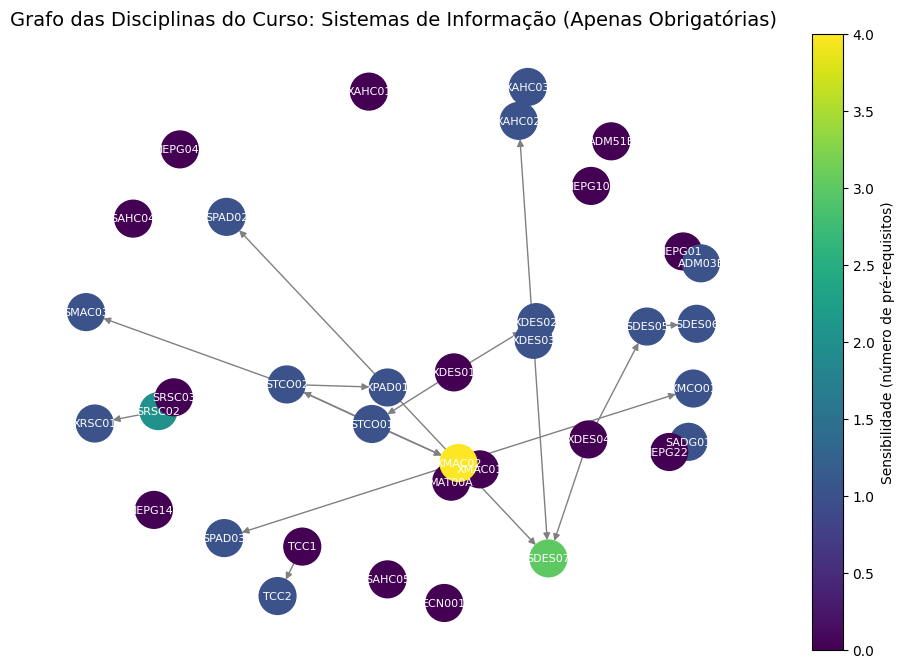

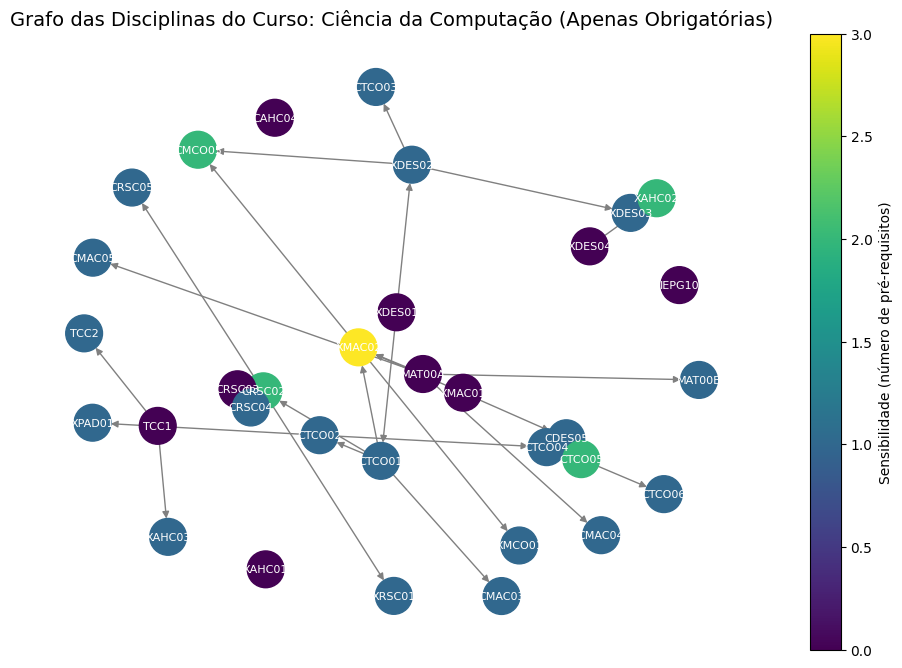

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import cm

def plot_course_graph(subjects, course_name, required_only=False):
    """
    Plota o grafo das disciplinas de um curso com a sensibilidade baseada no número de pré-requisitos.
    Permite filtrar apenas as disciplinas obrigatórias.
    """
    # Criação do grafo
    graph = nx.DiGraph()
    
    # Filtrar apenas as disciplinas obrigatórias, se necessário
    if required_only:
        subjects = [subject for subject in subjects if subject.type == SubjectType.REQUIRED]
    
    # Adiciona nós ao grafo
    for subject in subjects:
        graph.add_node(subject.cod, name=subject.name, num_prerequisites=len(subject.prerequisites))
    
    # Adiciona arestas (pré-requisitos)
    for subject in subjects:
        for prereq in subject.prerequisites:
            if prereq in graph.nodes:
                graph.add_edge(prereq, subject.cod)

    # Sensibilidade baseada no número de pré-requisitos
    num_prerequisites = nx.get_node_attributes(graph, 'num_prerequisites')
    max_prereq = max(num_prerequisites.values()) if num_prerequisites else 1
    node_colors = [num_prerequisites[node] / max_prereq for node in graph.nodes]
    
    # Configuração de cores
    cmap = cm.viridis
    norm = Normalize(vmin=0, vmax=max_prereq)
    
    # Criar figura e eixo
    fig, ax = plt.subplots(figsize=(12, 8))
    pos = nx.spring_layout(graph)  # Layout do grafo
    nx.draw(
        graph, pos, with_labels=True, ax=ax,
        labels={node: f"{node}" for node in graph.nodes},
        node_color=node_colors, cmap=cmap, node_size=700, edge_color='gray', font_size=8, font_color='white'
    )
    
    # Adicionar barra de cores ao eixo
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Sensibilidade (número de pré-requisitos)", fontsize=10)
    
    # Título do gráfico
    ax.set_title(
        f"Grafo das Disciplinas do Curso: {course_name}" +
        (" (Apenas Obrigatórias)" if required_only else ""), fontsize=14
    )
    plt.show()

# Exemplo de uso para disciplinas obrigatórias
plot_course_graph(sin_subjects, "Sistemas de Informação", required_only=True)
plot_course_graph(cco_subjects, "Ciência da Computação", required_only=True)


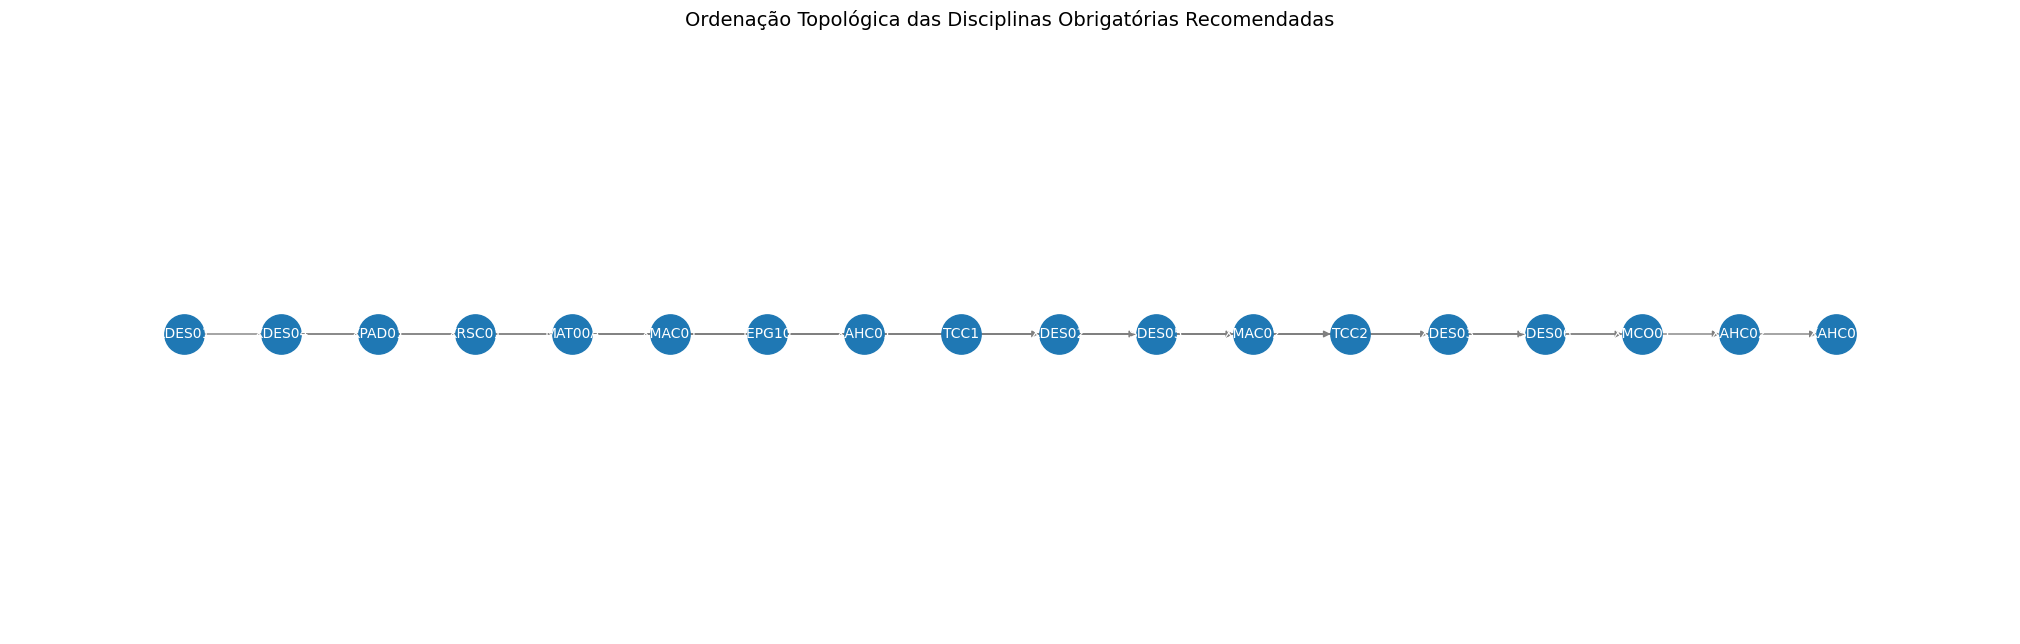

In [3]:
def plot_topological_order_with_arrows(selection, sin_subjects):
    """
    Plota a ordenação topológica das disciplinas obrigatórias recomendadas em uma linha horizontal com setas indicando as dependências.
    """
    # Criar um grafo direcionado para disciplinas obrigatórias recomendadas
    graph = nx.DiGraph()

    for subject in sin_subjects:
        if subject.cod in selection.completed_subjects and subject.type == SubjectType.REQUIRED:
            graph.add_node(subject.cod, label=subject.name)
            for prereq in subject.prerequisites:
                if prereq in selection.completed_subjects:
                    graph.add_edge(prereq, subject.cod)

    # Verificar se o grafo é acíclico
    if not nx.is_directed_acyclic_graph(graph):
        raise ValueError("O grafo das disciplinas obrigatórias recomendadas não é acíclico. Verifique os pré-requisitos.")

    # Gerar a ordenação topológica
    topo_sort = list(nx.topological_sort(graph))

    # Criar posições lineares para os nós (horizontalmente)
    pos = {node: (i, 0) for i, node in enumerate(topo_sort)}

    # Plotar o grafo
    plt.figure(figsize=(20, 6))
    nx.draw(
        graph, pos, with_labels=True,
        labels={n: n for n in graph.nodes},  # Exibe os códigos das disciplinas
        node_color="#1f78b4", node_size=800, font_size=10, font_color="white",
        edge_color="gray", arrows=True
    )

    # Adicionar título
    plt.title("Ordenação Topológica das Disciplinas Obrigatórias Recomendadas", fontsize=14)
    plt.axis("off")  # Remover eixos para melhor clareza
    plt.show()


# Gerar o gráfico com a ordenação topológica
plot_topological_order_with_arrows(selection, sin_subjects)

